## import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [2]:
data = pd.read_csv("/kaggle/input/booking-dataset/first inten project.csv")

In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [5]:
data.columns = data.columns.str.strip()


In [6]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [8]:
print(data.describe())

       number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.0000

## EDA

## feature extraction

In [9]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], format='%m/%d/%Y', errors='coerce')

## Check Missing Value

In [10]:
data.isnull().sum()

Booking_ID                   0
number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
P-C                          0
P-not-C                      0
average price                0
special requests             0
date of reservation         37
booking status               0
dtype: int64

In [11]:
data = data.dropna(subset=['date of reservation'])

In [12]:
print(data['date of reservation'].isna().sum())


0


In [13]:
data['day'] = data['date of reservation'].dt.day
data['month'] = data['date of reservation'].dt.month
data['year'] = data['date of reservation'].dt.year

In [14]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,day,month,year
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled,2,10,2015
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled,6,11,2018
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled,28,2,2018
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled,20,5,2017
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled,11,4,2018


# visulaization

In [15]:
max_year = data['year'].max()
min_year = data['year'].min()
print(max_year,min_year)

2018 2015


## Booking Status Distribution per Year

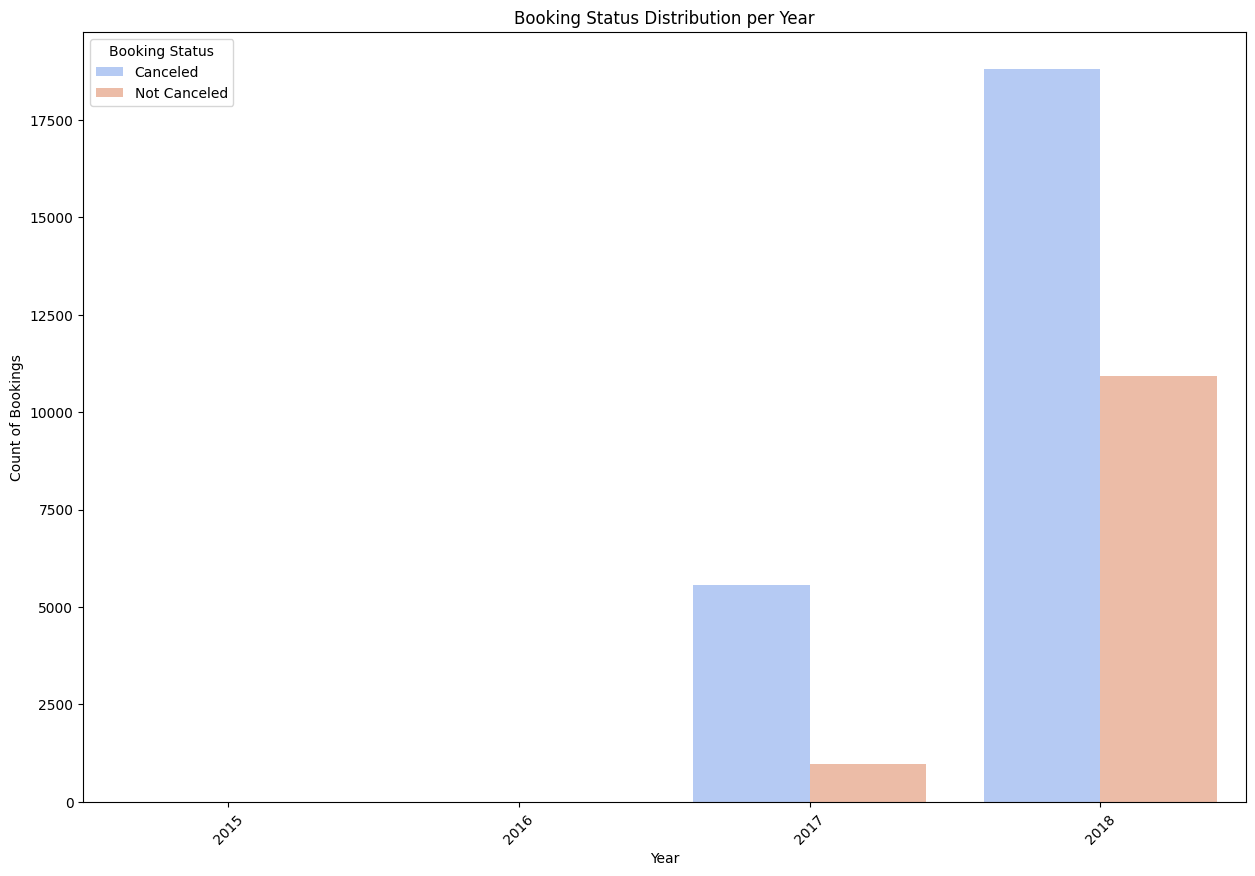

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x='year', hue='booking status', data=data, palette='coolwarm')

plt.xlabel("Year")
plt.ylabel("Count of Bookings")
plt.title("Booking Status Distribution per Year")
plt.legend(title="Booking Status", labels=["Canceled", "Not Canceled"])
plt.xticks(rotation=45)
plt.show()

## Booking Status Distribution per month

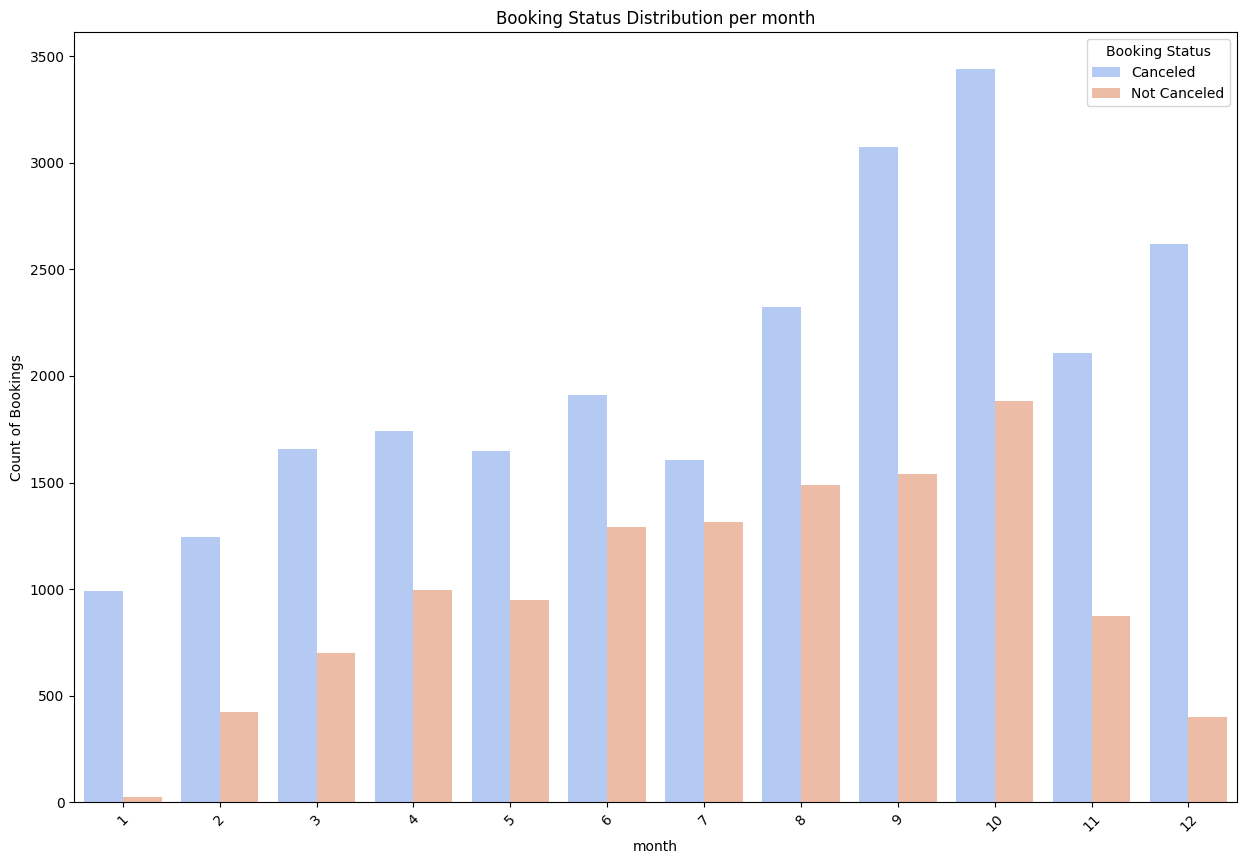

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='month', hue='booking status', data=data, palette='coolwarm')

plt.xlabel("month")
plt.ylabel("Count of Bookings")
plt.title("Booking Status Distribution per month")
plt.legend(title="Booking Status", labels=["Canceled", "Not Canceled"])
plt.xticks(rotation=45)
plt.show()

## Relationship between Number of Adults and Number of Children

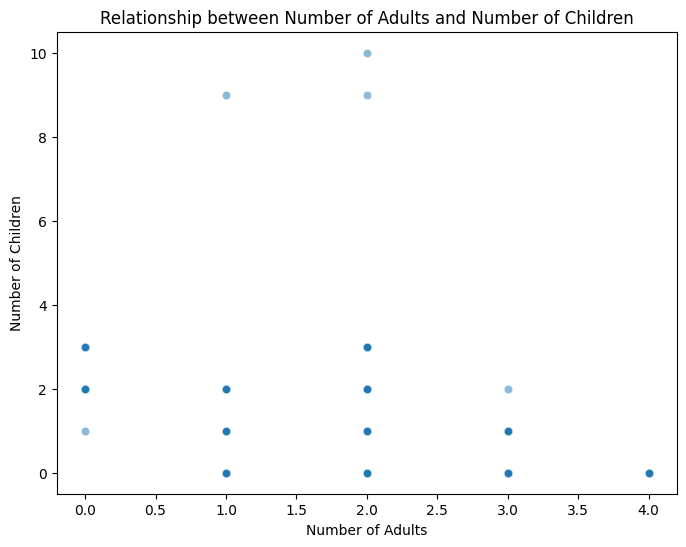

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['number of adults'], y=data['number of children'], alpha=0.5)
plt.xlabel("Number of Adults")
plt.ylabel("Number of Children")
plt.title("Relationship between Number of Adults and Number of Children")
plt.show()


## Relation Between Number of Adults and Children by Booking Status

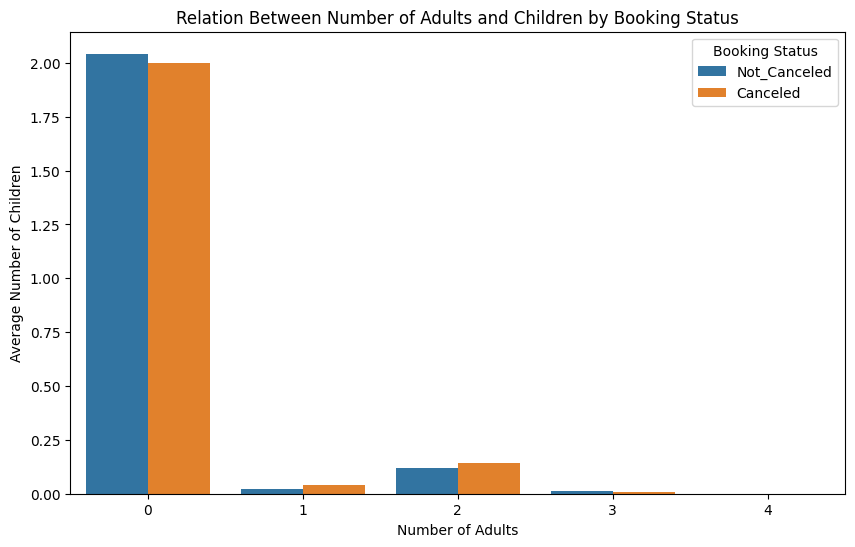

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x="number of adults", y="number of children", hue="booking status", data=data, ci=None)
plt.xlabel("Number of Adults")
plt.ylabel("Average Number of Children")
plt.title("Relation Between Number of Adults and Children by Booking Status")
plt.legend(title="Booking Status")
plt.show()


## know Unique Value for some columns

In [20]:
data['type of meal'].unique()


array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [21]:
data['type of meal'].value_counts()


type of meal
Meal Plan 1     27809
Not Selected     5131
Meal Plan 2      3303
Meal Plan 3         5
Name: count, dtype: int64

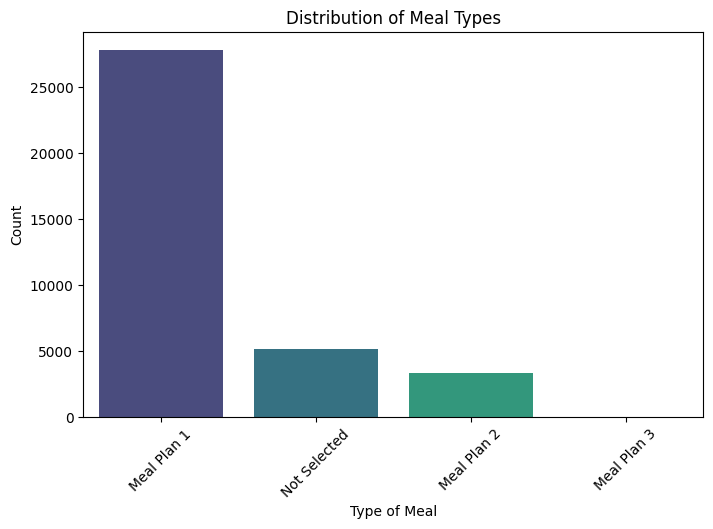

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x="type of meal", data=data, palette="viridis")
plt.xlabel("Type of Meal")
plt.ylabel("Count")
plt.title("Distribution of Meal Types")
plt.xticks(rotation=45)
plt.show()


In [23]:
data['market segment type'].unique()


array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [24]:
data['market segment type'].value_counts()


market segment type
Online           23201
Offline          10521
Corporate         2011
Complementary      390
Aviation           125
Name: count, dtype: int64

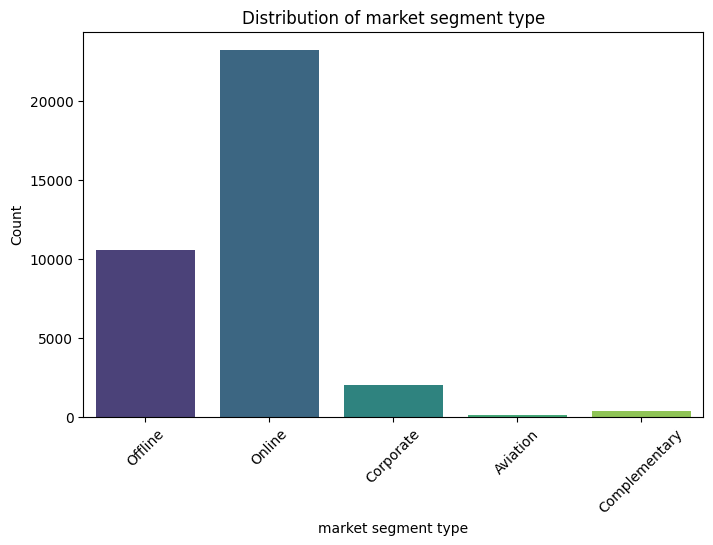

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x="market segment type", data=data, palette="viridis")
plt.xlabel("market segment type")
plt.ylabel("Count")
plt.title("Distribution of market segment type")
plt.xticks(rotation=45)
plt.show()


## Booking Status Distribution per market segment type

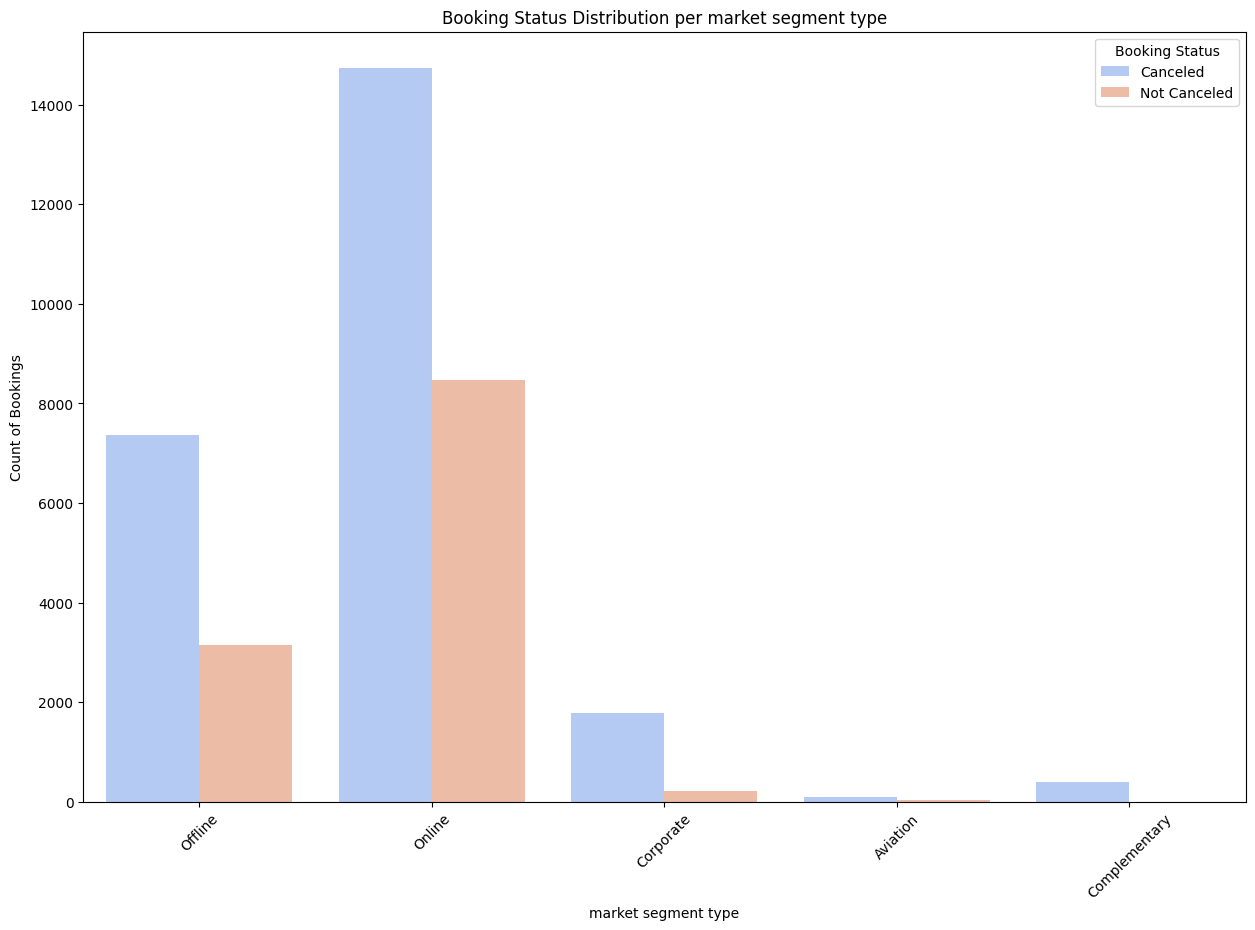

In [26]:
plt.figure(figsize=(15, 10))
sns.countplot(x='market segment type', hue='booking status', data=data, palette='coolwarm')

plt.xlabel("market segment type")
plt.ylabel("Count of Bookings")
plt.title("Booking Status Distribution per market segment type")
plt.legend(title="Booking Status", labels=["Canceled", "Not Canceled"])
plt.xticks(rotation=45)
plt.show()

In [27]:
data['room type'].unique()


array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [28]:
data['room type'].value_counts()

room type
Room_Type 1    28113
Room_Type 4     6051
Room_Type 6      964
Room_Type 2      692
Room_Type 5      263
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

## Distribution of Meal Types

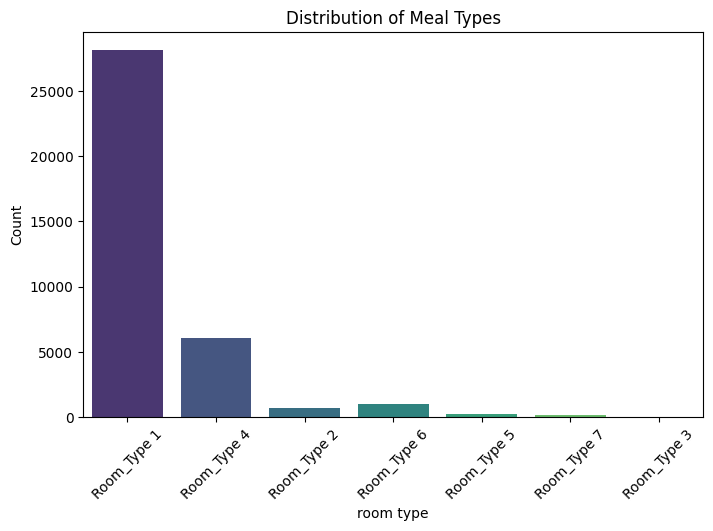

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x="room type", data=data, palette="viridis")
plt.xlabel("room type")
plt.ylabel("Count")
plt.title("Distribution of Meal Types")
plt.xticks(rotation=45)
plt.show()


## Booking Status Distribution per room type

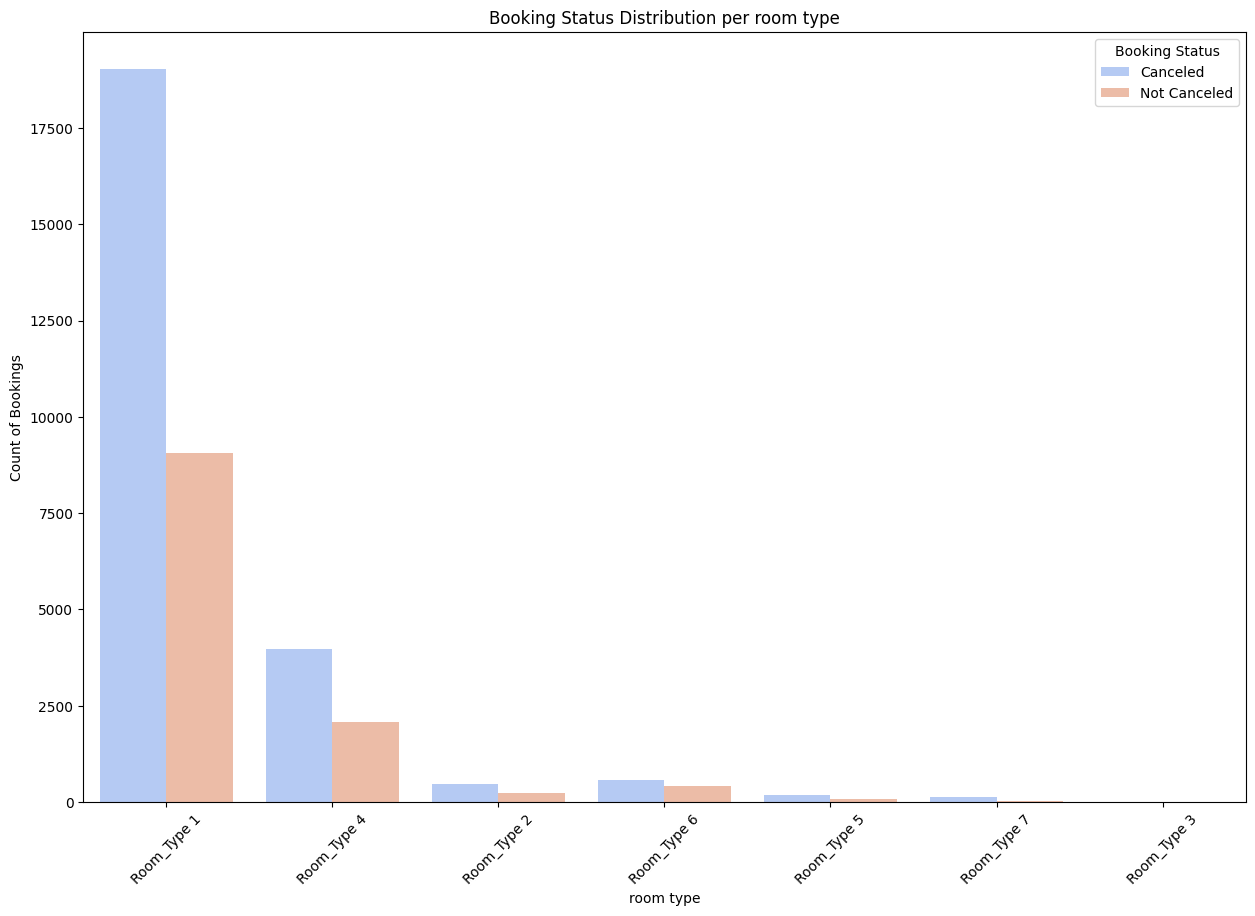

In [30]:
plt.figure(figsize=(15, 10))
sns.countplot(x='room type', hue='booking status', data=data, palette='coolwarm')

plt.xlabel("room type")
plt.ylabel("Count of Bookings")
plt.title("Booking Status Distribution per room type")
plt.legend(title="Booking Status", labels=["Canceled", "Not Canceled"])
plt.xticks(rotation=45)
plt.show()

## Market Segment vs. Average Price

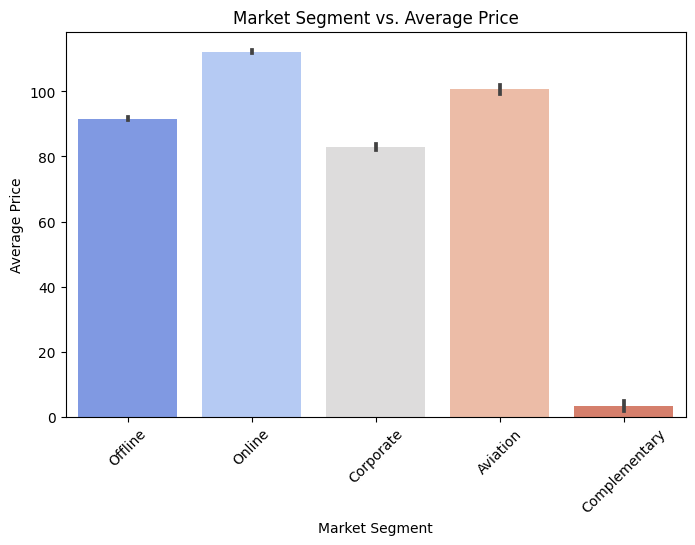

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x="market segment type", y="average price", data=data, palette="coolwarm")
plt.xlabel("Market Segment")
plt.ylabel("Average Price")
plt.title("Market Segment vs. Average Price")
plt.xticks(rotation=45)
plt.show()


## Room Type vs. Average Price Distribution

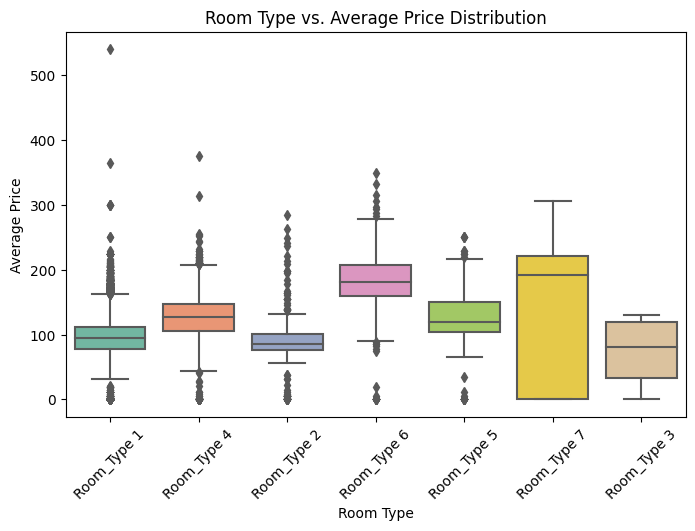

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="room type", y="average price", data=data, palette="Set2")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.title("Room Type vs. Average Price Distribution")
plt.xticks(rotation=45)
plt.show()


## Meal Type vs. Average Price

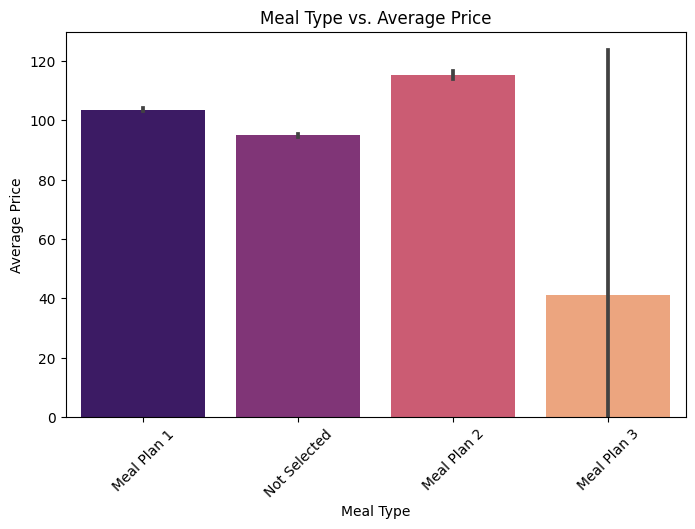

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x="type of meal", y="average price", data=data, palette="magma")
plt.xlabel("Meal Type")
plt.ylabel("Average Price")
plt.title("Meal Type vs. Average Price")
plt.xticks(rotation=45)
plt.show()


## Market Segment vs. Room Type Booking Frequency

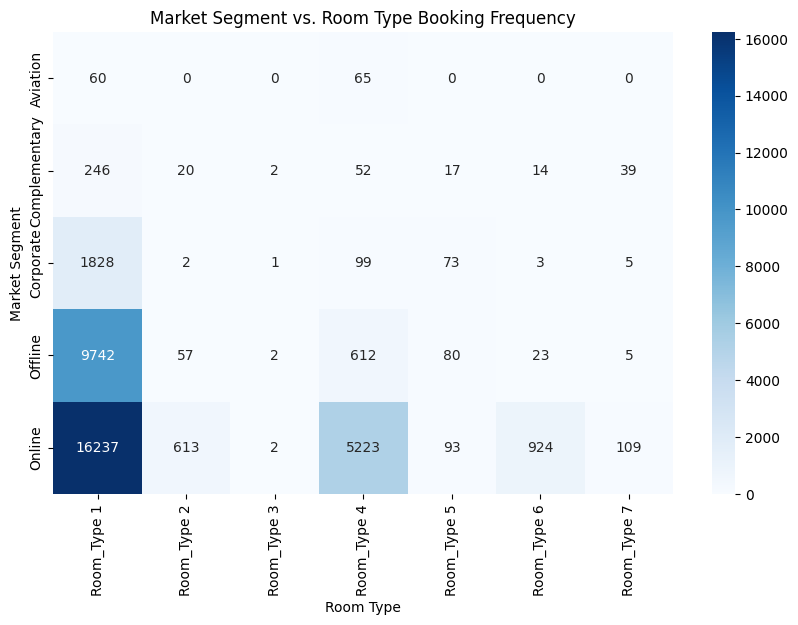

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.pivot_table(index="market segment type", columns="room type", aggfunc="size", fill_value=0),
            cmap="Blues", annot=True, fmt="d")
plt.xlabel("Room Type")
plt.ylabel("Market Segment")
plt.title("Market Segment vs. Room Type Booking Frequency")
plt.show()


In [35]:
data['booking status'].unique()


array(['Not_Canceled', 'Canceled'], dtype=object)

In [36]:
data['booking status'].value_counts()


booking status
Not_Canceled    24366
Canceled        11882
Name: count, dtype: int64

## Casting Features

In [37]:
data = data.drop(['Booking_ID', 'date of reservation' ,'day'], axis=1)

## Handle Catogrical Data

In [38]:
encoder = LabelEncoder()

data['type of meal'] = encoder.fit_transform(data['type of meal'])
data['room type'] = encoder.fit_transform(data['room type'])
data['market segment type'] = encoder.fit_transform(data['market segment type'])
data['booking status'] = encoder.fit_transform(data['booking status'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36248 non-null  int64  
 1   number of children        36248 non-null  int64  
 2   number of weekend nights  36248 non-null  int64  
 3   number of week nights     36248 non-null  int64  
 4   type of meal              36248 non-null  int64  
 5   car parking space         36248 non-null  int64  
 6   room type                 36248 non-null  int64  
 7   lead time                 36248 non-null  int64  
 8   market segment type       36248 non-null  int64  
 9   repeated                  36248 non-null  int64  
 10  P-C                       36248 non-null  int64  
 11  P-not-C                   36248 non-null  int64  
 12  average price             36248 non-null  float64
 13  special requests          36248 non-null  int64  
 14  booking sta

## correlation for Data

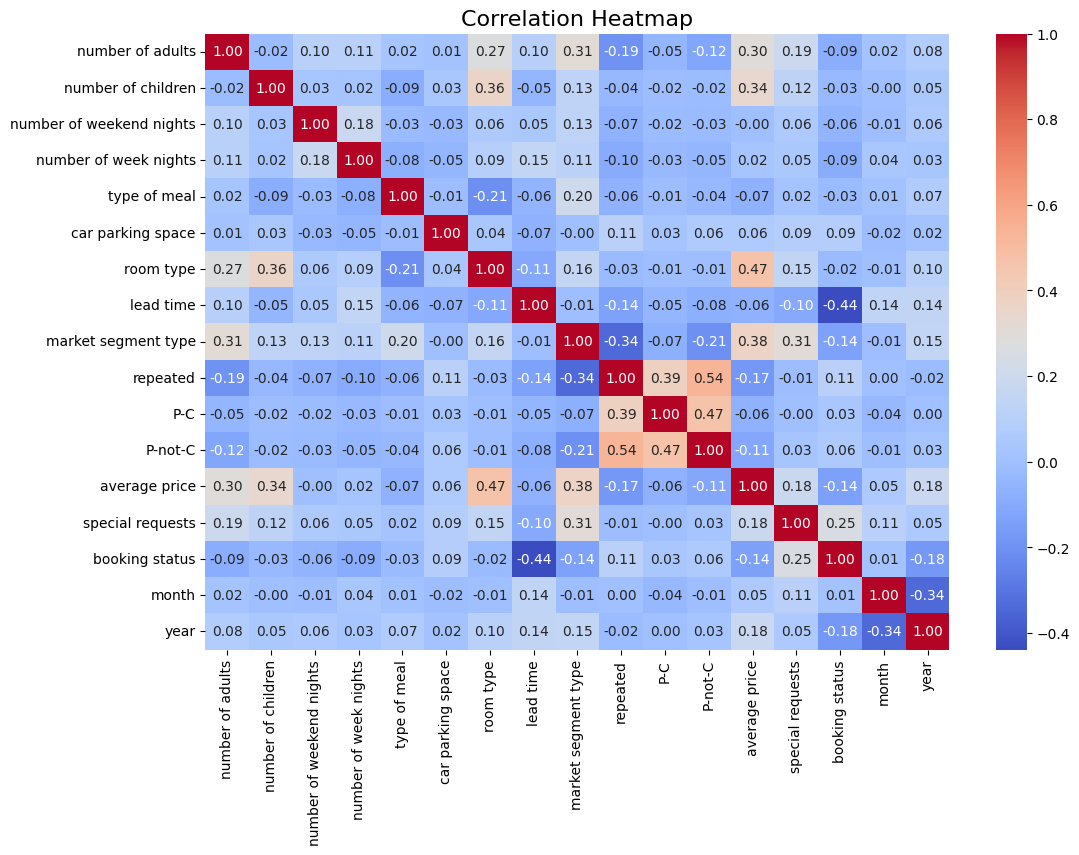

In [40]:
correlation = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, 
            annot=True,           
            fmt=".2f",            
            cmap="coolwarm",      
            cbar=True)            
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Relationship Between P-C and Repeated Bookings

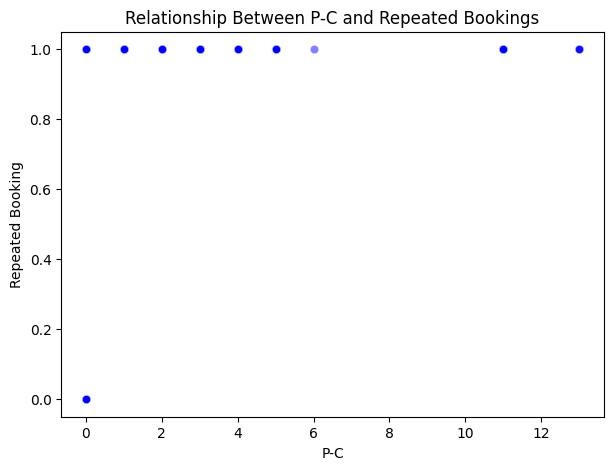

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.scatterplot(x=data['P-C'], y=data['repeated'], alpha=0.5, color='blue')
plt.title("Relationship Between P-C and Repeated Bookings")
plt.xlabel("P-C")
plt.ylabel("Repeated Booking")
plt.show()


## preprocessing

## Check Outliers 

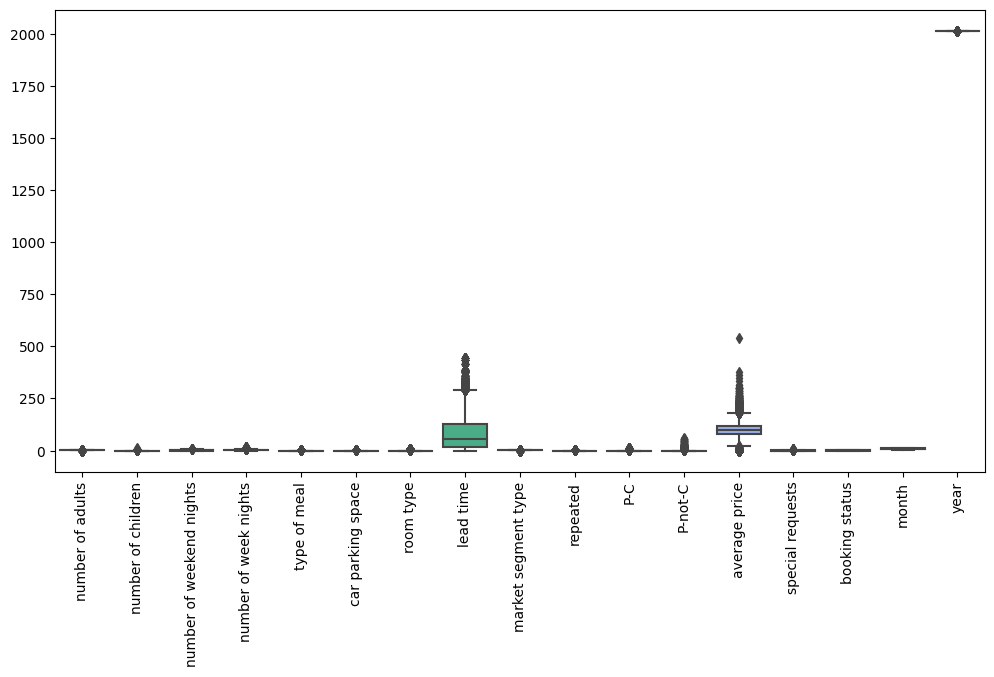

In [42]:

# Boxplot for all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


## Handle Outliers

In [43]:
def remove_outliers_iqr(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df


data = remove_outliers_iqr(data,'lead time')


In [44]:
data = remove_outliers_iqr(data,'average price')

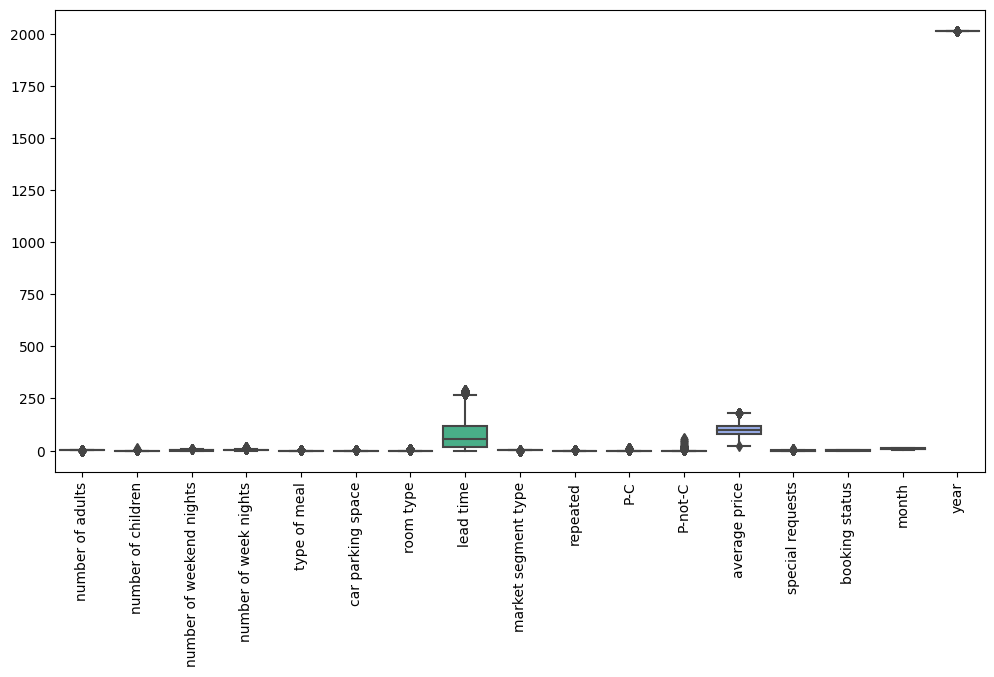

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)  
plt.show()

## Scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['average price'] = scaler.fit_transform(data[['average price']])


## Check Imbalance Data

In [47]:
data['booking status'].value_counts()

booking status
1    22895
0    10417
Name: count, dtype: int64

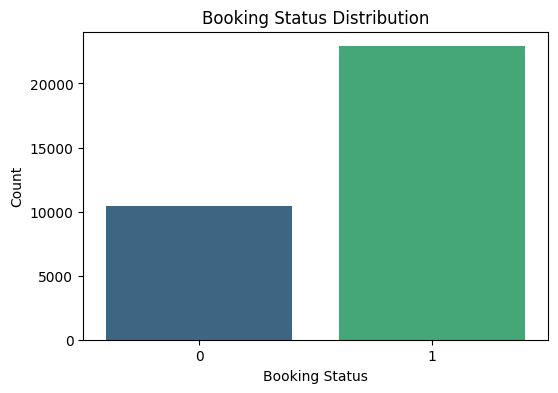

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=data['booking status'], palette="viridis")
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()


## Handle imbalance data

In [49]:
X = data.drop(columns=['booking status']) 
y = data['booking status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())


booking status
1    18307
0    18307
Name: count, dtype: int64


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## LogisticRegression

In [51]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_scaled, y_train_resampled)
y_pred_lr = lr_model.predict(X_test_scaled)



## RandomForestClassifier

In [52]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



In [53]:
def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"📌 {model_name} Model Evaluation:")
    print(f"✔️ Accuracy: {accuracy:.4f}")
    print(f"✔️ Precision: {report['1']['precision']:.4f}")
    print(f"✔️ Recall: {report['1']['recall']:.4f}")
    print(f"✔️ F1-Score: {report['1']['f1-score']:.4f}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()



📌 Random Forest Model Evaluation:
✔️ Accuracy: 0.9020
✔️ Precision: 0.9164
✔️ Recall: 0.9438
✔️ F1-Score: 0.9299


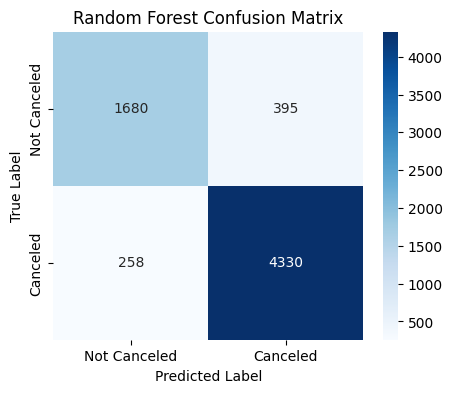

📌 Logistic Regression Model Evaluation:
✔️ Accuracy: 0.7756
✔️ Precision: 0.8806
✔️ Recall: 0.7799
✔️ F1-Score: 0.8272


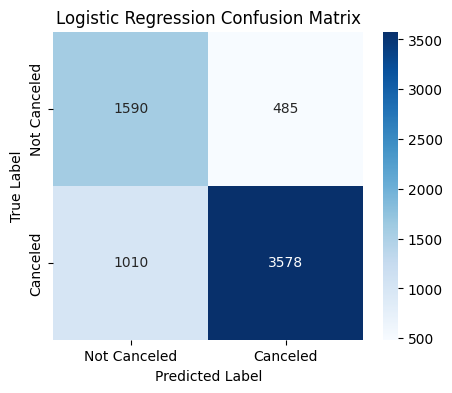

In [54]:
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")